# Modélisation de la propagation du Paludisme et luttes possibles

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

In [23]:
data = pd.DataFrame()
data['Time'] =  [0,365,365*2,365*3,365*4,365*5,365*6,365*7,365*8]
data['N_h'] = [10039338,10293331,10549678,10811545,11083635,11369071,11668818,11980937,12301939]
data['D_h'] = [73287,69995,67518,65950,64285,63667,63012,63499,63970]
data['S_h']= [6696358,8483583,6973916,6813612,5303960,2784195,859919,32989,1904259]
data['E_h']= [2070304,1393373,2611916,2125509,2567394,3587320,4177496,3144393,2023452]
data['I_h']= [638669,208898,483470,939076,1610812,2505794,3324678,4413473,4198029]
data['Death due to malaria'] = [670,380,459,409,496,516,715,376,345]
data['Death malaria cum'] = [670,1050,1509,1918,2414,2930,3645,4021,4366]
data['Other death'] = data['D_h']-data['Death due to malaria']
data['R_h']= [634007,207477,480376,933348,1601469,2491762,3306725,4390082,4176199]
data['N_m'] = [154262,404748,362179,305214,259097,235101,161756,98205,139667]
data['S_m'] = [78102,353382,290497,255438,198842,115975,35820,1374,76942]
data['E_m'] = [75989,51143,71553,49519,59814,118364,124925,95489,61448]
data['I_m'] = [171,224,130,257,441,762,1011,1342,1277]

## Création du modèle

Modèles couplés : SEIR pour les humains et SEI pour les moustiques.

![alt text](image/model_malaria.png "model malaria")

Les variables d’état sont représentées comme suit :  
  
Pour la population humaine :
- Sh : Nombre de personnes susceptibles d’être infectées
- Eh : Nombre de personnes ayant été exposées au paludisme et qui deviendront infectieuses
- Ih : Nombre de personnes infectieuses
- Rh : Nombre de personnes guéries de la maladie et encore immunisées contre une nouvelle infection.

Avec la population totale Nh = Sh + Eh + Ih + Rh.  
  
Pour la population de moustiques :
- Sm : Nombre de moustiques susceptibles d’être infectés
- Em : Nombre de moustiques qui ont été exposés et qui deviendront infectieux
- Im : Nombre de moustiques infectieux

Avec, dans ce cas, la population totale Nm = Sm + Em + Im

Equa diff du modèle:
$$ \frac{dS_h}{dt} = \Lambda_{h} N_{h} - \frac{b \beta_{h} S_{h}(t) I_{m}(t)}{1 + v_{h} I_{m}(t)} - \mu_{h} S_{h}(t) + \omega R_{h}(t) $$
$$ \frac{dE_h}{dt} = \frac{b \beta_{h} S_{h}(t) I_{m}(t)}{1 + v_{h} I_{m}(t)} - (\alpha_{h} + \mu_{h}) E_{h}(t) $$
$$ \frac{dI_h}{dt} = \alpha_{h} E_{h}(t) - (r + \mu_{h} + \delta_{h}) I_{h}(t) $$
$$ \frac{dR_h}{dt} = r I_{h}(t) - (\mu_{h} + w) R_{h}(t)$$
$$ \frac{dS_m}{dt} = \Lambda_{m} N_{m} - \frac{b \beta_{m} S_{m}(t) I_{h}(t)}{1 + v_{m} I_{h}(t)} - \mu_{m} S_{m}(t)$$
$$ \frac{dE_m}{dt} = \frac{b \beta_{m} S_{m}(t) I_{h}(t)}{1 + v_{m} I_{h}(t)} - (\alpha_{m} + \mu_{m}) E_{m}(t)$$
$$ \frac{dI_m}{dt} = \alpha_{m} E_{m}(t) - (\mu_{m} + \delta_{m}) I_{m}(t) $$


Où : 
- Λh Terme de recrutement de personnes susceptibles = Taux de natalité.
- Λm Terme de recrutement de moustiques susceptibles = Taux de natalité.
- b Taux de piqûre des moustiques.
- βh Probabilité de transmission de la maladie d’un moustique infectieux vers un humain.
- βm Probabilité de transmission de la maladie d’un humain infectieux vers un moustique.
- μh Taux de mortalité humaine.
- μm Taux de mortalité des moustiques.
- δh Taux de mortalité humaine due à la maladie.
- δm Taux de mortalité des moustiques due à la maladie.
- αh Taux de progression des humains de la catégorie exposé à infectieux.
- αm Taux de progression des moustiques de la catégorie exposé à infectieux.
- r Taux de guérison des humains de la catégorie infectieux à rémission.
- w Taux de perte d’immunité des humains.
- νh Proportion d’anticorps produits par les humains suite à l’infection par un moustique.
- νm Proportion d’anticorps produits par les moustiques suite à l’infection par un humain.

Où : 
| Symbole | Paramètre |
| --- | --- |
Λh | Terme de recrutement de personnes susceptibles = Taux de natalité.
Λm | Terme de recrutement de moustiques susceptibles = Taux de natalité.
b | Taux de piqûre des moustiques.
βh | Probabilité de transmission de la maladie d’un moustique infectieux vers un humain.
βm | Probabilité de transmission de la maladie d’un humain infectieux vers un moustique.
μh | Taux de mortalité humaine.
μm | Taux de mortalité des moustiques.
δh | Taux de mortalité humaine due à la maladie.
δm | Taux de mortalité des moustiques due à la maladie.
αh | Taux de progression des humains de la catégorie exposé à infectieux.
αm | Taux de progression des moustiques de la catégorie exposé à infectieux.
r | Taux de guérison des humains de la catégorie infectieux à rémission.
w | Taux de perte d’immunité des humains.
νh | Proportion d’anticorps produits par les humains suite à l’infection par un moustique.
νm | Proportion d’anticorps produits par les moustiques suite à l’infection par un humain.

### Paramètres du modèle

In [24]:
lambda_h = (4.5/2)*1/(365*63) # Recruitement term
lambda_m = 1/30

b = 0.12 # Taux de morsure des moustiques aux humains

beta_h = 0.022*0.00638 # Probabilite de developper la maladie
beta_m = 0.24*0.0696

mu_h = 1/(365*63) # Mortalite
mu_m = 1/30 #1/14.3

sigma_h = 670/(638669*365)*0.2 # Mortalite liee a la maladie
sigma_m = 0

alpha_h = 1/17*0.2 # Taux de progression de Expose a Infecieux
alpha_m = 1/10

r = (1-sigma_h)/200# Taux de guerision des humains de Infectieux a Recover

w = 1/(365) # Taux de perte d'immunité des humains de Recovered a Susceptible

v_h = 0.005 # Proportion des anticorps produits suite a une infection
# Fixe a 1 pour l'instant mais il faudra changer car pas logique
v_m = 0

### Conditions initiales

In [25]:
N_h = data['N_h'][0]
N_m = data['N_m'][0]

S_h0 = data['S_h'][0]
S_m0 = data['S_m'][0]

E_h0 = data['E_h'][0]
E_m0 = data['E_m'][0]

I_h0 = data['I_h'][0]
I_m0 = data['I_m'][0]

R_h0 = data['R_h'][0]

D_h0 = data['Death due to malaria'][0]
D_m0 = 0


z0 = [S_h0,E_h0,I_h0,R_h0,D_h0, S_m0,E_m0,I_m0]

ts = 0
tf = 365*8
Dt = 1
t = np.arange(ts, tf+Dt, Dt)

### Définition du modèle

In [26]:
def model(z,t,lambda_h,lambda_m,b,beta_h,beta_m,mu_h,mu_m,sigma_h,sigma_m,alpha_h,alpha_m,r,w,v_h,v_m):
    
    S_h = z[0]
    E_h = z[1]
    I_h = z[2]
    R_h = z[3]
    D_h = z[4]

    S_m = z[5]
    E_m = z[6]
    I_m = z[7]
    #D_m = z[8]
    
    dS_hdt = lambda_h*(S_h+E_h+I_h+R_h) - (b*beta_h*S_h*I_m)/(1+v_h*I_m) - mu_h*S_h + w*R_h
    dE_hdt = (b*beta_h*S_h*I_m)/(1+v_h*I_m) - (alpha_h+mu_h)*E_h
    dI_hdt = alpha_h*E_h - (r+mu_h+sigma_h)*I_h
    dR_hdt = r*I_h - (mu_h+w)*R_h
    dD_hdt = sigma_h*I_h # Morts causées par la malaria
    
    dS_mdt = lambda_m*(S_m+E_m+I_m) - (b*beta_m*S_m*I_h)/(1+v_m*I_h) - mu_m*S_m
    dE_mdt = (b*beta_m*S_m*I_h)/(1+v_m*I_h) - (alpha_m+mu_m)*E_m
    dI_mdt = alpha_m*E_m - (mu_m+sigma_m)*I_m
    return[dS_hdt,dE_hdt,dI_hdt,dR_hdt,dD_hdt,dS_mdt,dE_mdt,dI_mdt]

### Résolution du modèles

In [27]:
z = odeint(model,z0,t,args=(lambda_h,lambda_m,b,beta_h,beta_m,mu_h,mu_m,sigma_h,sigma_m,alpha_h,alpha_m,r,w,v_h,v_m))
S_h = z[:,0]
E_h = z[:,1]
I_h = z[:,2]
R_h = z[:,3]
D_h = z[:,4]
S_m = z[:,5]
E_m = z[:,6]
I_m = z[:,7]


### Visualisation des solutions

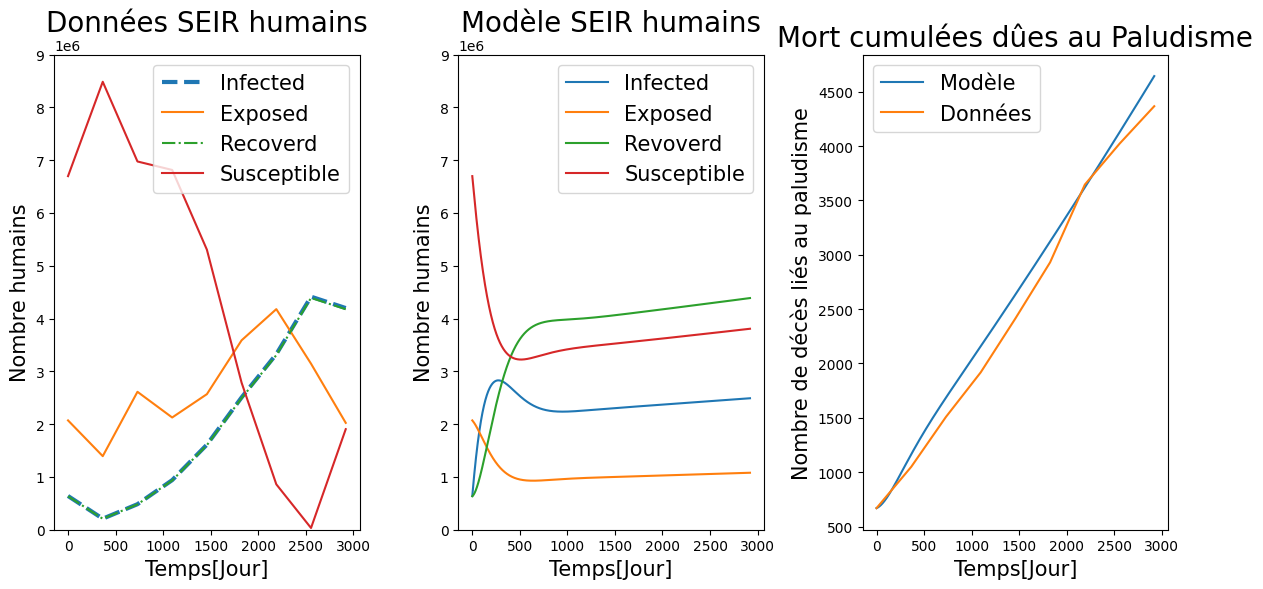

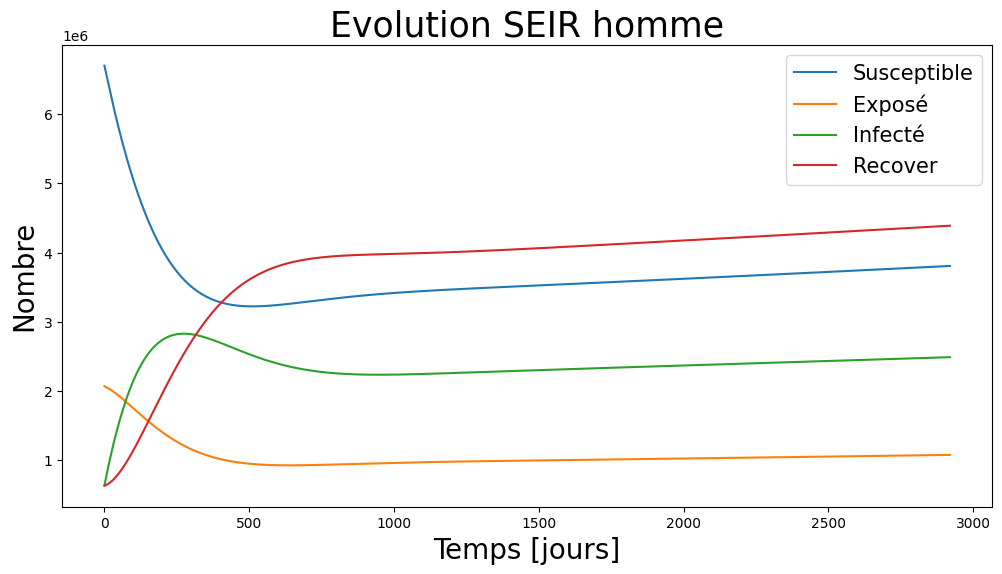

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.plot(data['Time'],data['I_h'],label='Infected',lw=3,ls='--')
plt.plot(data['Time'],data['E_h'],label='Exposed')
plt.plot(data['Time'],data['R_h'],label='Recoverd',ls='-.')
plt.plot(data['Time'],data['S_h'],label='Susceptible')
plt.ylim([0,9e6])
plt.xlabel('Temps[Jour]',fontsize=15)
plt.ylabel('Nombre humains',fontsize=15)
plt.title('Données SEIR humains',fontsize=20)
plt.legend(fontsize=15)

plt.subplot(132)
plt.plot(t,I_h,label='Infected')
plt.plot(t,E_h,label='Exposed')
plt.plot(t,R_h,label='Revoverd')
plt.plot(t,S_h,label='Susceptible')
#plt.plot(t,D_h,label='Death malaria')
plt.ylim([0,9e6])
plt.xlabel('Temps[Jour]',fontsize=15)
plt.ylabel('Nombre humains',fontsize=15)
plt.title('Modèle SEIR humains',fontsize=20)
plt.legend(fontsize=15)

plt.subplot(133)
plt.plot(t,D_h,label='Modèle')
plt.plot(data['Time'],data['Death malaria cum'],label='Données')
plt.xlabel('Temps[Jour]',fontsize=15)
plt.ylabel('Nombre de décès liés au paludisme',fontsize=15)
plt.title('Mort cumulées dûes au Paludisme',fontsize=20)
plt.legend(fontsize=15)

plt.tight_layout()
plt.show()

#%% (6) Graphiques homme SEIR
plt.figure(figsize=(12,6))
plt.plot(t,S_h,label='Susceptible')
plt.plot(t,E_h,label='Exposé')
plt.plot(t,I_h,label='Infecté')
plt.plot(t,R_h,label='Recover')
#plt.plot(t,D_h,label='Dead',color='purple')
#plt.plot(t,P_h,label='Population',color='black')
plt.title('Evolution SEIR homme',fontsize=25)
plt.xlabel('Temps [jours]',fontsize=20)
plt.ylabel('Nombre',fontsize=20)
plt.legend(fontsize=15)
plt.show()

## Modélisation impact de différentes luttes

### Vaccination : réduction de sigma_h de 30%

sigma_h= 4.023779162130353e-07 Total mort= 3451.2449538089245
sigma_h= 5.748255945900504e-07 Total mort= 4642.92695933515


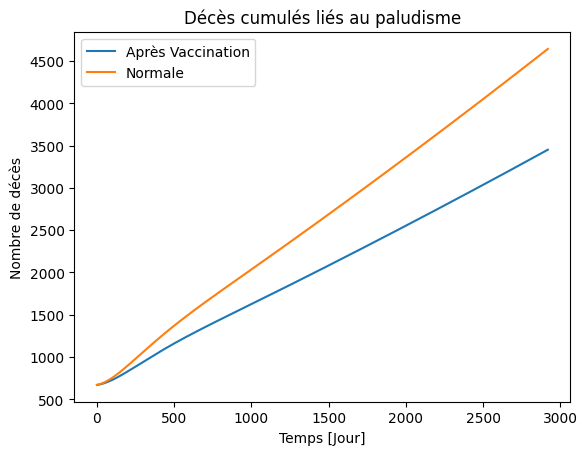

In [29]:
Vaccin = 670/(638669*365)*0.2*0.7
Normale =  670/(638669*365)*0.2
for sigma_h in [Vaccin,Normale ]:
    z = odeint(model,z0,t,args=(lambda_h,lambda_m,b,beta_h,beta_m,mu_h,mu_m,sigma_h,sigma_m,alpha_h,alpha_m,r,w,v_h,v_m))
    S_h = z[:,0]
    E_h = z[:,1]
    I_h = z[:,2]
    R_h = z[:,3]
    D_h = z[:,4]
    S_m = z[:,5]
    E_m = z[:,6]
    I_m = z[:,7]
    plt.plot(t,D_h)
    plt.legend(['Après Vaccination','Normale'])
    plt.title('Décès cumulés liés au paludisme')
    plt.xlabel('Temps [Jour]')
    plt.ylabel('Nombre de décès')
    print('sigma_h=',sigma_h,'Total mort=',D_h[-1])
plt.show()

### Réduction des contacts

b= 0.06 Total mort= 3677.3918334304976
b= 0.12 Total mort= 4642.92695933515


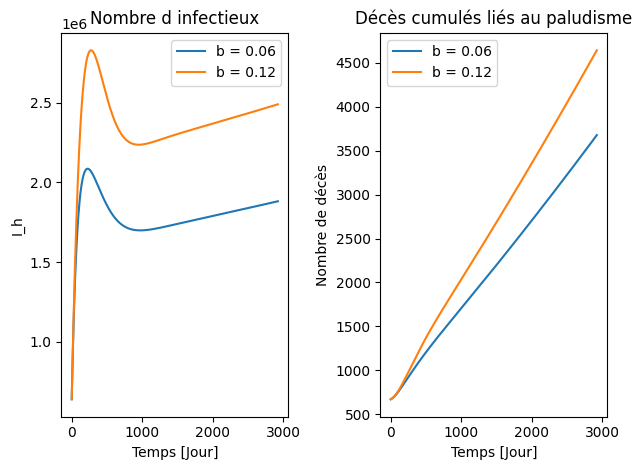

In [30]:
Reduit = 0.06
Normale =  0.12
for b in [Reduit,Normale]:
    z = odeint(model,z0,t,args=(lambda_h,lambda_m,b,beta_h,beta_m,mu_h,mu_m,sigma_h,sigma_m,alpha_h,alpha_m,r,w,v_h,v_m))
    S_h = z[:,0]
    E_h = z[:,1]
    I_h = z[:,2]
    R_h = z[:,3]
    D_h = z[:,4]
    S_m = z[:,5]
    E_m = z[:,6]
    I_m = z[:,7]
    plt.subplot(121)
    plt.plot(t,I_h)
    plt.legend(['b = 0.06','b = 0.12'])
    plt.title('Nombre d infectieux' )
    plt.xlabel('Temps [Jour]')
    plt.ylabel('I_h')   
    plt.subplot(122)
    plt.plot(t,D_h)
    plt.legend(['b = 0.06','b = 0.12'])
    plt.title('Décès cumulés liés au paludisme')
    plt.xlabel('Temps [Jour]')
    plt.ylabel('Nombre de décès')
    print('b=',b,'Total mort=',D_h[-1])
plt.tight_layout()
plt.show()

### Réduction du nombre de moustiques

µ_m= 0.037037037037037035 Total mort= 3589.4100830330667
µ_m= 0.03333333333333333 Total mort= 4642.92695933515


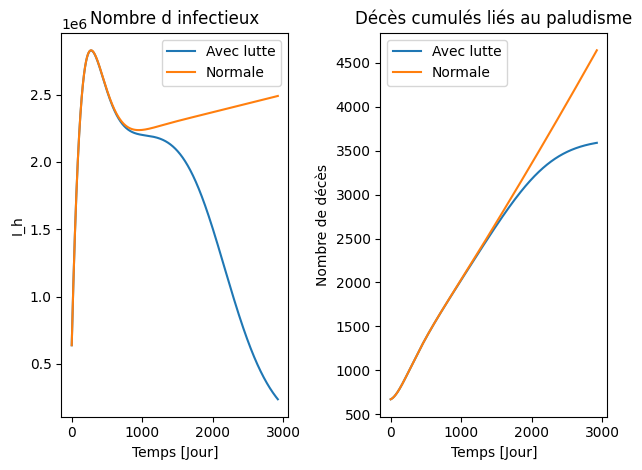

In [31]:
Reduit = 1/27
Normale = 1/30
for mu_m in [Reduit,Normale]:
    z = odeint(model,z0,t,args=(lambda_h,lambda_m,b,beta_h,beta_m,mu_h,mu_m,sigma_h,sigma_m,alpha_h,alpha_m,r,w,v_h,v_m))
    S_h = z[:,0]
    E_h = z[:,1]
    I_h = z[:,2]
    R_h = z[:,3]
    D_h = z[:,4]
    S_m = z[:,5]
    E_m = z[:,6]
    I_m = z[:,7]
    plt.subplot(121)
    plt.plot(t,I_h)
    plt.legend(['Avec lutte','Normale'])
    plt.title('Nombre d infectieux' )
    plt.xlabel('Temps [Jour]')
    plt.ylabel('I_h')   
    plt.subplot(122)
    plt.plot(t,D_h)
    plt.legend(['Avec lutte','Normale'])
    plt.title('Décès cumulés liés au paludisme')
    plt.xlabel('Temps [Jour]')
    plt.ylabel('Nombre de décès')
    print('µ_m=',mu_m,'Total mort=',D_h[-1])
plt.tight_layout()
plt.show()